### Support Vector Machines Example 4.1
We will first fit a model using the Radial kernel, following the same procedure as before. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from SVM_def import SVM_def

# SVM_def is a class containing definitions used throughout this Chapter
svm_def = SVM_def()

# Create nonlinear data
n = 100
np.random.seed(0) 
# x from normal distribution # y is 1 or 2
x = np.random.normal(scale = 1.0, size = (2*n, 2)) 
y = np.concatenate((np.ones(int(3/2*n)), 2*np.ones(int(1/2*n)))) 

x[:n, :] += 2
x[n:int(n*1.5), :] -= 2

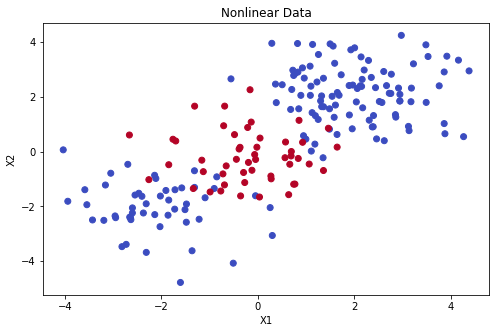

In [2]:
fig = plt.figure(figsize=[8, 5])

# Create scatter plot data
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(x[:,0], x[:,1], c=y, cmap=cm.coolwarm,  marker="o")

plt.xlabel("X1"), plt.ylabel("X2")
plt.title("Nonlinear Data")
plt.show()

In [3]:
""" First fit Radial Kernel """
# Create grid to evaluate model
xy, xx, yy = svm_def.create_grid(x, 100) 

# divide training data
np.random.seed(0) 
itrain = np.random.choice(200, 100, replace=False)
# Test dataset
xtest = np.delete(x, itrain, axis=0)
ytest = np.delete(y, itrain, axis=0)

c, gamma = 1, 2
clf_g2 = svm.SVC(kernel='rbf', C=c, gamma=gamma)
clf_g2.fit(x[itrain], y[itrain])
Z_g2 = clf_g2.decision_function(xy).reshape(xx.shape)

Number of Support Vectors:  70


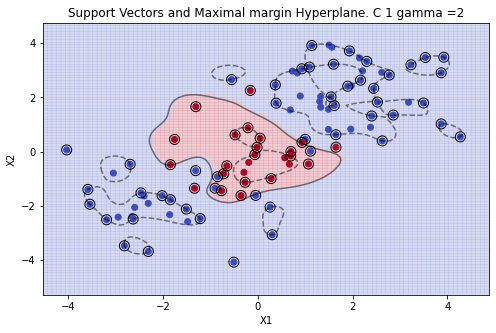

In [4]:
## plot model
fig = plt.figure(figsize=[8, 5])
ax = fig.add_subplot(1, 1, 1) 
svm_def.svm_plot(ax, x[itrain, :], y[itrain], Z_g2, clf_g2, coloring=True)

title = ("Support Vectors and Maximal margin Hyperplane. C " + str(c) 
         + " gamma =" + str(gamma))
plt.title(title)

print("Number of Support Vectors: ", len(clf_g2.support_))

The function **sklearn.metric.plot\_roc\_curve()** can be used to produce ROC curves. After the model has been fitted, we can plot the ROC curve.  

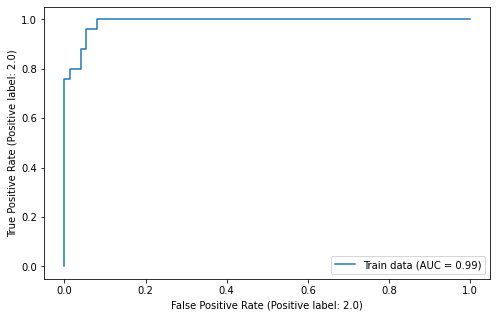

In [5]:
""" ROC plot using plot_roc_curve """
fig = plt.figure(figsize=[8, 5])
ax = fig.add_subplot(1, 1, 1) 
# plot_roc_curve(clf_g2, xtest, ytest, ax=ax, name="Test Data")
plot_roc_curve(clf_g2, x[itrain], y[itrain], ax=ax, name="Train data")
plt.show()

SVM appears to be producing accurate predictions. By increasing $\gamma$ we can produce a more flexible fit and generate further improvements in accuracy. 

In [6]:
""" Increased gamma in fit  """
# New model
c, gamma = 1, 20
clf_g20 = svm.SVC(kernel='rbf', C=c, gamma=gamma)
clf_g20.fit(x[itrain], y[itrain])
Z_g20 = clf_g20.decision_function(xy).reshape(xx.shape)

Number of Support Vectors:  100


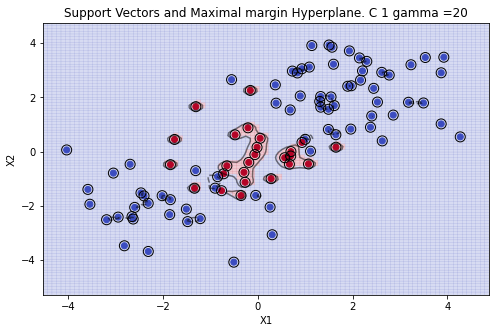

In [7]:
# plot model
fig = plt.figure(figsize=[8, 5])
ax = fig.add_subplot(1, 1, 1) 
svm_def.svm_plot(ax, x[itrain, :], y[itrain], Z_g20, clf_g20, 
                 coloring=True)
title = ("Support Vectors and Maximal margin Hyperplane. C " + str(c) 
         + " gamma =" + str(gamma))
plt.title(title)

print("Number of Support Vectors: ", len(clf_g20.support_))

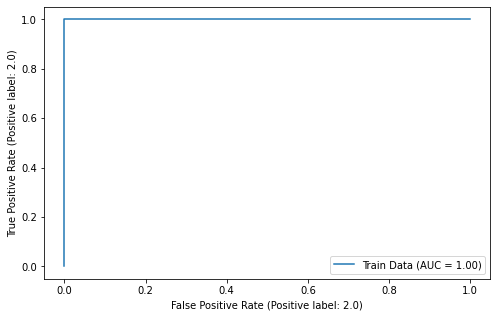

In [8]:
""" ROC plot using plot_roc_curve: Train data flexible """
fig = plt.figure(figsize=[8, 5])
ax = fig.add_subplot(1, 1, 1) 
# plot_roc_curve(clf_g20, xtest, ytest, ax=ax, name="Test Data")
plot_roc_curve(clf_g20, x[itrain], y[itrain], ax=ax, name="Train Data")

plt.show()

However, these ROC curves are all on the training data. We are really more interested in the level of prediction accuracy on the test data. When we compute the ROC curves on the test data, the model with $\gamma=20$ appears to provide the most accurate results. 

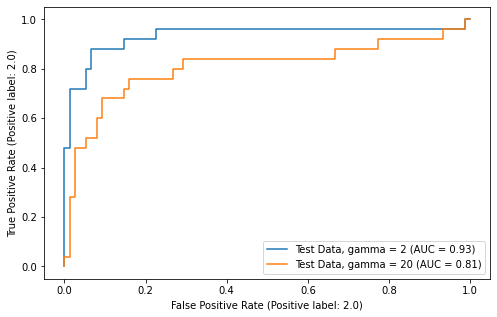

In [9]:
""" ROC plot using plot_roc_curve: Test data """
fig = plt.figure(figsize=[8, 5])
ax = fig.add_subplot(1, 1, 1) 
plot_roc_curve(clf_g2, xtest, ytest, ax=ax, name="Test Data, gamma = 2")
plot_roc_curve(clf_g20, xtest, ytest, ax=ax, name="Test Data, gamma = 20")

plt.show()